In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./gm2offline_ana_26583650_17453.00099.root")
t = f.Get("farline/eventTree")

3024
[17105, 17124, 17133, 17171, 17179, 17180, 17220, 17251, 17261, 17265, 17268, 17292, 17300, 17302, 17304, 17307, 17310, 17327, 17334, 17336, 17341, 17343, 17352, 17376, 17393, 17441, 17453, 17456, 17494, 17520]


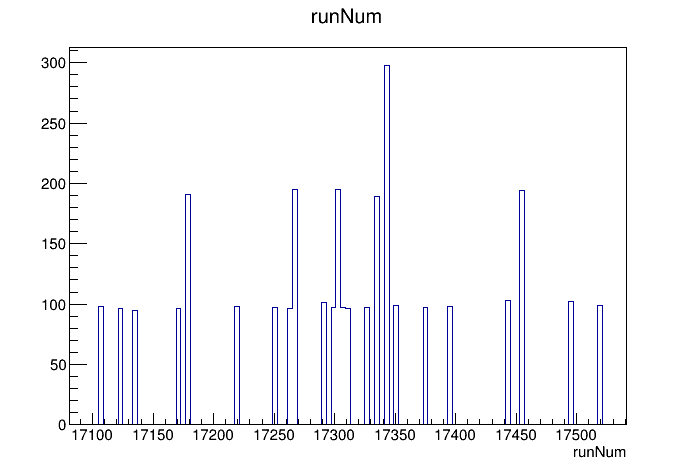

In [3]:
c = r.TCanvas()
nentries = t.Draw("runNum","","")
print(nentries)
runs = []
for i in range(nentries):
    runs.append(int(t.GetV1()[i]))
runs = list(set(runs))
runs.sort()
print(runs)
c.Draw()

In [20]:
runStart = min(runs)
runStop = max(runs)
nruns = runStop-runStart

caloNum = 4

Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


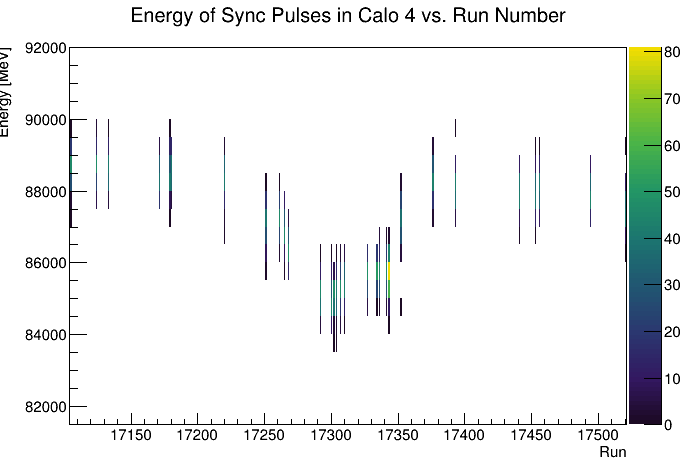

In [59]:
c = r.TCanvas()
h2 = r.TH2D("h2", "Energy of Sync Pulses in Calo "+str(caloNum)+" vs. Run Number; Run; Energy [MeV]",
            nruns+2, runStart-1, runStop+1,
            100,50000,100000
           )

t.Draw("energy:runNum>>h2","caloNum == "+str(caloNum)+" && time < 0 && energy > 20000","goff")
h2.GetYaxis().SetRangeUser(h2.GetMean(2) - 5000, h2.GetMean(2) + 5000)
h2.Draw("colz")
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


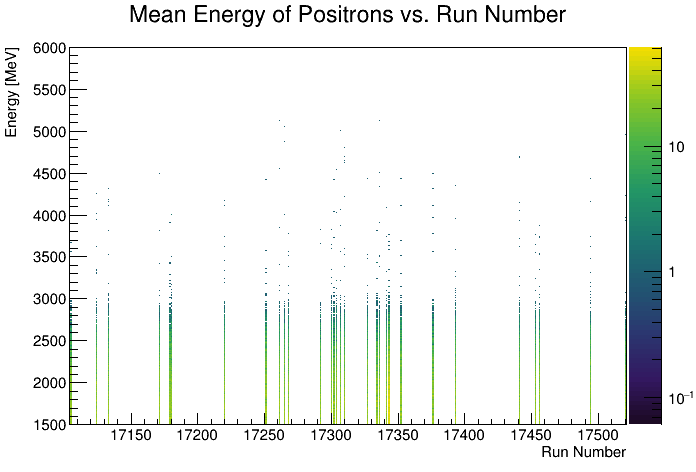

In [60]:
c = r.TCanvas()
h = r.TH2D("h","Mean Energy of Positrons vs. Run Number; Run Number; Energy [MeV]",
          nruns+2, runStart-1, runStop+1,
          600,1500,6000)
t.Draw("energy:runNum>>h","caloNum == "+str(caloNum)+" && time > 24000 && energy < 6000","goff")
h.Draw("colz")
c.SetLogz()
c.Draw()

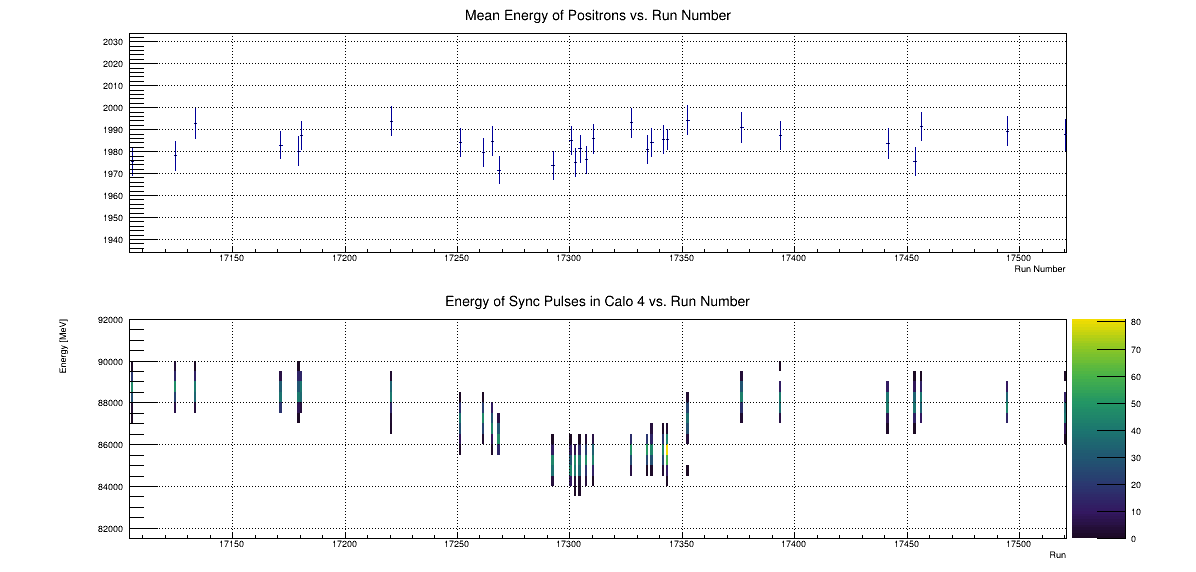

In [61]:
c = r.TCanvas("c","c",1200,600)
c.Divide(1,2)

c.cd(1)
hx = h.ProfileX().Clone("hx")
#hx.GetYaxis().SetRangeUser(2110,2180)
#hx.GetYaxis().SetRangeUser(1300,1550)
hx.GetYaxis().SetRangeUser(hx.GetMean(2) - 50, hx.GetMean(2) + 50)

hx.DrawCopy("")
hx.Delete()
r.gPad.SetGrid()

c.cd(2)

h2.GetYaxis().SetRangeUser(h2.GetMean(2) - 5000, h2.GetMean(2) + 5000)
h2.Draw("colz")
r.gPad.SetGrid()

c.Draw()

In [62]:
#runsplit = 17393 #calo 6
#runsplit = runs[7] #calo 17
runsplit = runs[10] #calo 1
range1 = r.TF1("range1","pol0",0, runsplit-1)
range2 = r.TF1("range1","pol0", runsplit, 17350)
range2.SetLineColor(6)


****************************************
Minimizer is Linear
Chi2                      =      7.85383
NDf                       =            9
p0                        =      1983.81   +/-   2.03696     

****************************************
Minimizer is Linear
Chi2                      =      10.8963
NDf                       =           11
p0                        =      1981.68   +/-   1.77546     

****************************************
Minimizer is Linear
Chi2                      =      2504.76
NDf                       =           51
p0                        =      88099.6   +/-   112.857     

****************************************
Minimizer is Linear
Chi2                      =      1608.24
NDf                       =           58
p0                        =      85487.8   +/-   73.9387     


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


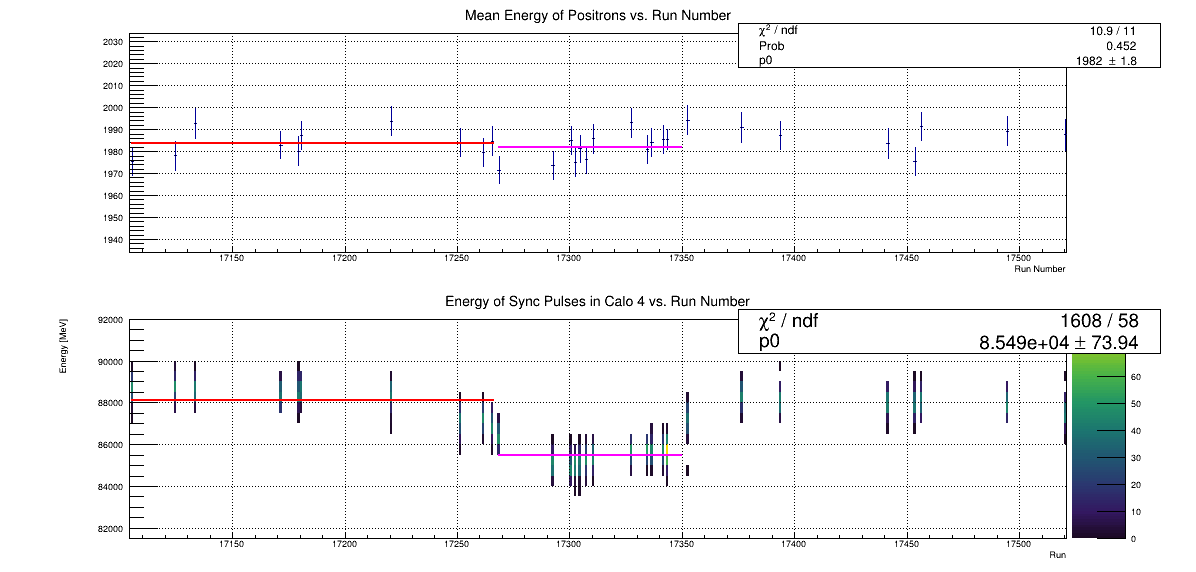

In [64]:
c = r.TCanvas("c","c",1200,600)
c.Divide(1,2)

c.cd(1)
hx = h.ProfileX().Clone("hx")
#hx.GetYaxis().SetRangeUser(2110,2180)
hx.GetYaxis().SetRangeUser(hx.GetMean(2) - 50, hx.GetMean(2) + 50)

hx.Fit(range1,"R")
hx.Fit(range2,"R")


hx.DrawCopy("")
hx.Delete()
r.gPad.SetGrid()
range1.DrawCopy("same")
range2.DrawCopy("same")


c.cd(2)

h2.GetYaxis().SetRangeUser(h2.GetMean(2) - 5000, h2.GetMean(2) + 5000)
h2.Draw("colz")

h2.Fit(range1,"R")
h2.Fit(range2,"R")

range1.DrawCopy("same")
range2.DrawCopy("same")

r.gPad.SetGrid()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


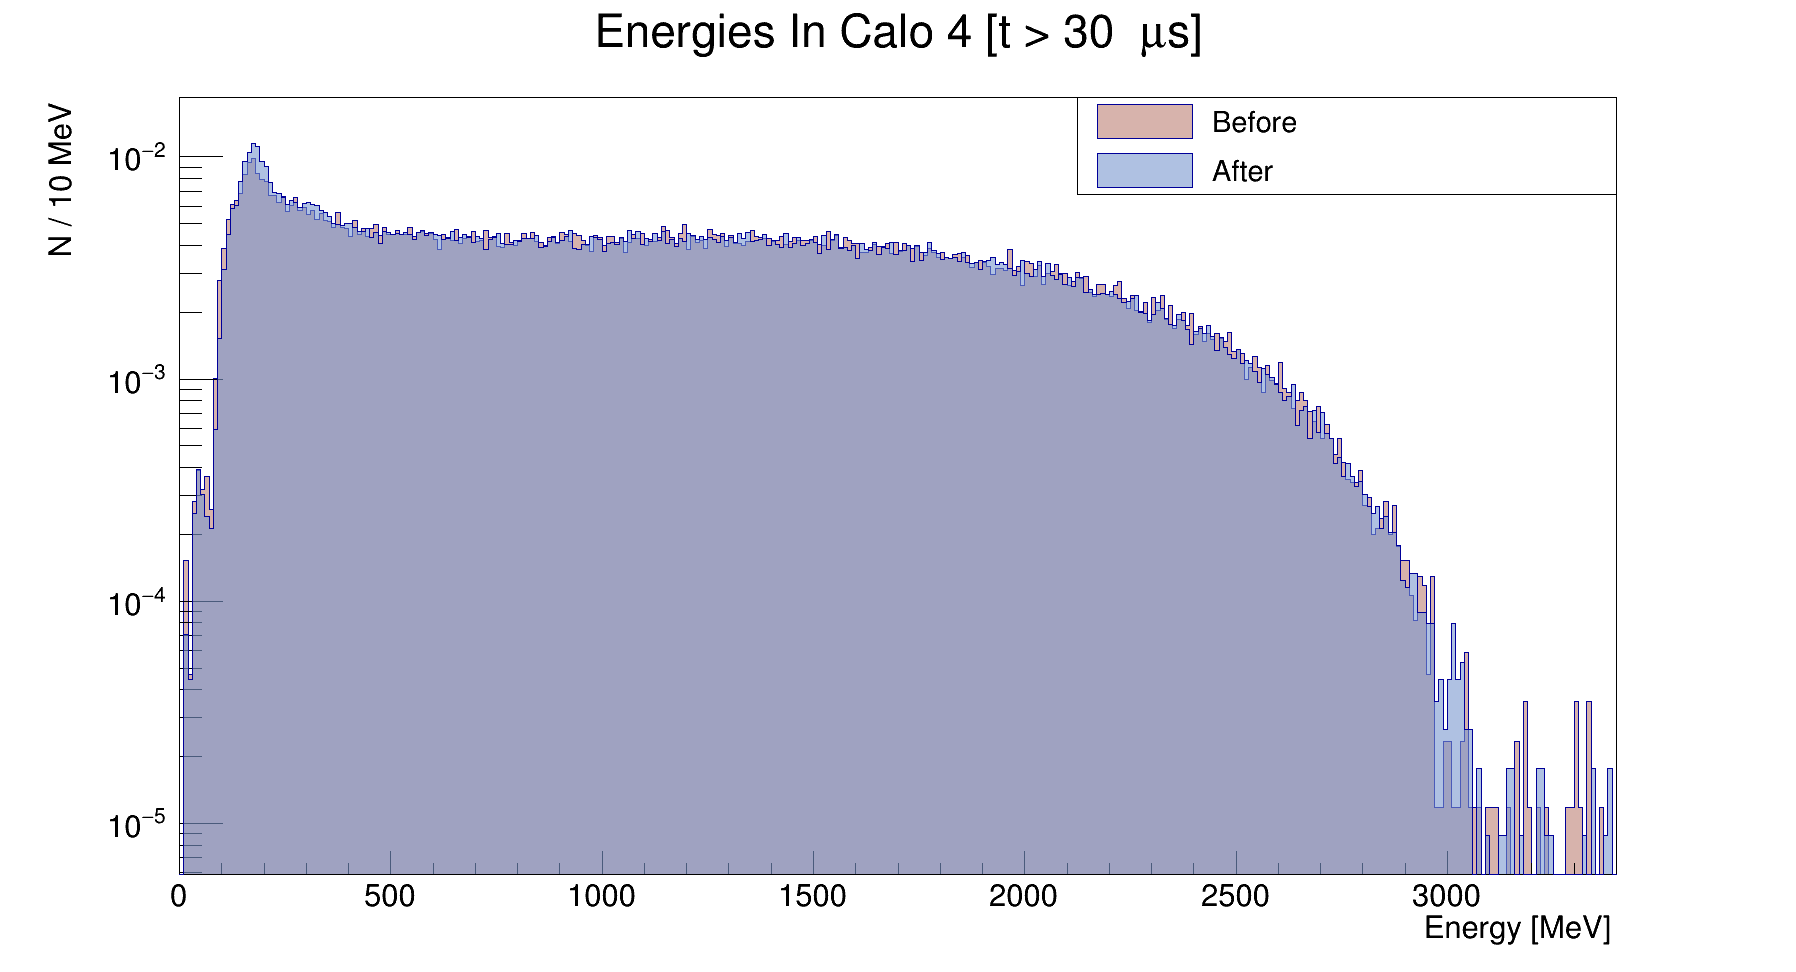

In [74]:
c = r.TCanvas("c","c",1800,1000)
h = r.TH1D("h","Energies In Calo "+str(caloNum)+ " [t > 30 #mus]; Energy [MeV]; N / 10 MeV",600,0,6000)
h.SetFillColorAlpha(45,0.6)
h2 = r.TH1D("h2","Energies After Sync Pulse Change",600,0,6000)
h2.SetFillColorAlpha(38,0.6)

t.Draw("energy>>h","time > 24000 && runNum <"+str(runsplit)+" && caloNum == "+str(caloNum),"goff")
t.Draw("energy>>h2","time > 24000 && runNum >= "+str(runsplit)+" && runNum < 17350"+" && caloNum == "+str(caloNum),"goff")

h.Scale(1/h.Integral())
h2.Scale(1/h2.Integral())

h.GetXaxis().SetRangeUser(0,3400)

h.Draw("hist")
h2.Draw("hist SAME")

leg = r.TLegend(0.6,0.8,0.9,0.9)
leg.AddEntry(h,"Before", "f")
leg.AddEntry(h2,"After", "f")
leg.Draw("SAME")

c.SetLogy()
c.Draw()



****************************************
Minimizer is Linear
Chi2                      =      302.255
NDf                       =          258
p0                        =     0.965859   +/-   0.00976178  
p1                        =  2.48003e-05   +/-   7.13084e-06 


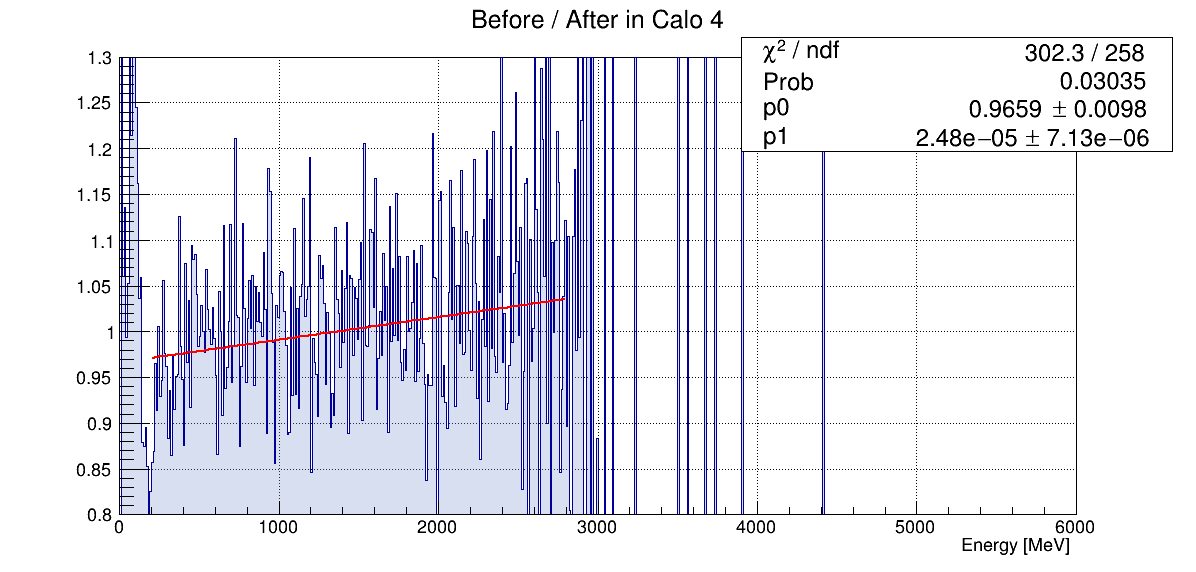

In [56]:
c = r.TCanvas("c","c",1200,600)

energyscale = r.TF1("energyscale","pol1",200,2800)

hdiff = h.Clone("hdiff")
hdiff.SetTitle("Before / After in Calo "+str(caloNum))
hdiff.GetYaxis().SetRangeUser(0.8,1.3)
hdiff.Divide(h2)
hdiff.Draw("hist")

hdiff.Fit(energyscale,"R")
energyscale.Draw("SAME")

c.SetGrid()
c.Draw()

---


****************************************
Minimizer is Linear
Chi2                      =      302.255
NDf                       =          258
p0                        =     0.965859   +/-   0.00976178  
p1                        =  2.48003e-05   +/-   7.13084e-06 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


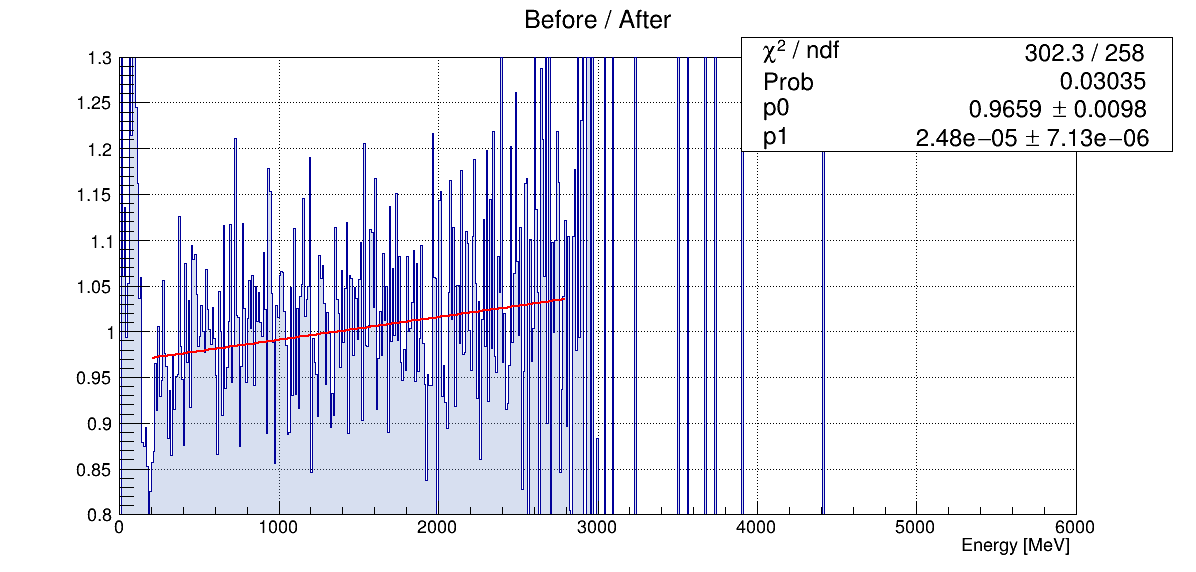

In [29]:
c = r.TCanvas("c","c",1200,600)

energyscale = r.TF1("energyscale","pol1",200,2800)

hdiff = h.Clone("hdiff")
hdiff.SetTitle("Before / After")
hdiff.GetYaxis().SetRangeUser(0.8,1.3)
hdiff.Divide(h2)
hdiff.Draw("hist")

hdiff.Fit(energyscale,"R")
energyscale.Draw("SAME")

c.SetGrid()
c.Draw()